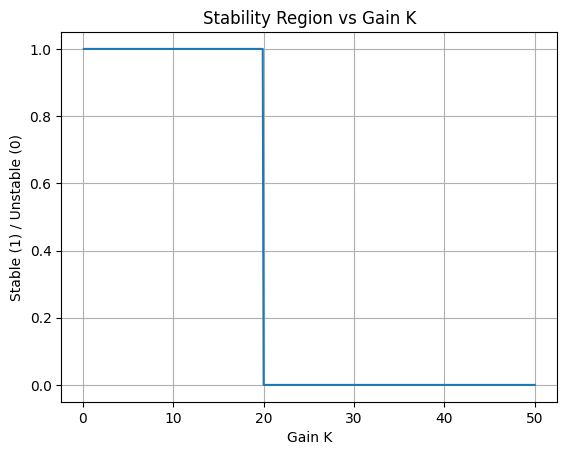

Approximate Stable Gain Range:
K ∈ (0.10, 19.90)


In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Gain values to test
K_values = np.linspace(0.1, 50, 500)

stable_K = []

for K in K_values:
    # G(s) = K / (s(s+1)(s+4))
    num = [K]
    den = [1, 5, 4, 0]  # s^3 + 5s^2 + 4s + 0
    G = ctrl.tf(num, den)
    T = ctrl.feedback(G, 1)

    poles = ctrl.poles(T)

    # Check stability
    if np.all(np.real(poles) < 0):
        stable_K.append(K)

# Plot stability region
plt.figure()
plt.plot(K_values, [k in stable_K for k in K_values])
plt.title("Stability Region vs Gain K")
plt.xlabel("Gain K")
plt.ylabel("Stable (1) / Unstable (0)")
plt.grid(True)
plt.show()

print("Approximate Stable Gain Range:")
print(f"K ∈ ({min(stable_K):.2f}, {max(stable_K):.2f})")
